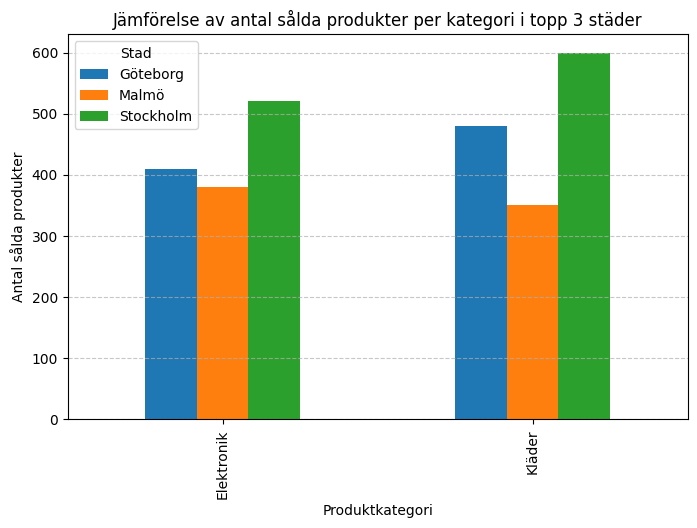

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Exempeldataset (byt ut mot ditt verkliga data)
data = {
    "Stad": ["Stockholm", "Göteborg", "Malmö", "Stockholm", "Göteborg", "Malmö"],
    "Kategori": ["Elektronik", "Elektronik", "Elektronik", "Kläder", "Kläder", "Kläder"],
    "Antal_sålda": [520, 410, 380, 600, 480, 350]
}

df = pd.DataFrame(data)

# Skapa ett stapeldiagram (histogram)
pivot_df = df.pivot(index="Kategori", columns="Stad", values="Antal_sålda")

pivot_df.plot(kind="bar", figsize=(8,5))
plt.title("Jämförelse av antal sålda produkter per kategori i topp 3 städer")
plt.xlabel("Produktkategori")
plt.ylabel("Antal sålda produkter")
plt.legend(title="Stad")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
